In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
from sklearn.svm import SVC
from sklearn import datasets

iris = datasets.load_iris()
X = iris["data"][:, (2,3)] #peatal length and petal width
y = iris["target"]

setosa_or_versicolor = (y==0)|(y==1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]



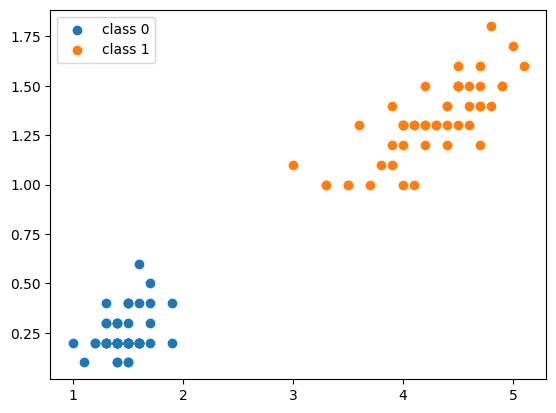

In [3]:
plt.scatter(X[:,0][y==0],X[:,1][y==0],label="class 0")
plt.scatter(X[:,0][y==1],X[:,1][y==1],label="class 1")
plt.legend()
plt.show()


In [6]:
#SVM Classifier model
svm_clf = SVC(kernel="linear",C =(1e10)) #max c --> Hard Classifier
svm_clf.fit(X,y)

SVC(C=10000000000.0, kernel='linear')

In [7]:
svm_clf.coef_#Weights terms

array([[1.29411744, 0.82352928]])

In [8]:
svm_clf.intercept_ #bias term

array([-3.78823471])

In [18]:
def plot_svc_decision_boundary(svm_clf,xmin,xmax):
  w = svm_clf.coef_[0]
  b = svm_clf.intercept_[0]

  #At the boundary w0*x0 + w1*x1 + b = 0
  #=> x1 = -w0/w1 * x0 - b/w1

  x0 = np.linspace(xmin,xmax,200)
  decision_boundary = -w[0]/w[1] * x0 - b/w[1]

  margin = 1/w[1]
  gutter_up = decision_boundary + margin
  gutter_down = decision_boundary - margin

  svs = svm_clf.support_vectors_
  plt.scatter(svs[:,0],svs[:,1],s=180,facecolors='#FFAAAA', label = "Support Vectors") #Highlight support vectors
  plt.plot(x0,decision_boundary,"k-",linewidth=2,label = "Hyperplane")
  plt.plot(x0,gutter_up,"k--",linewidth=2)
  plt.plot(x0,gutter_down,"k--",linewidth=2)


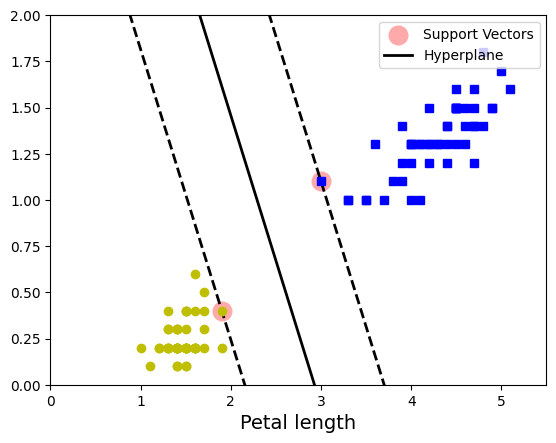

In [19]:
plot_svc_decision_boundary(svm_clf, 0, 5.5)
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], "bs")
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], "yo")
plt.xlabel("Petal length", fontsize=14)
plt.axis([0, 5.5, 0, 2])
plt.legend()
plt.show()



In [21]:
svm_clf.support_vectors_
np.array([[1.9,0.4],
        [3. , 1.1]])


array([[1.9, 0.4],
       [3. , 1.1]])

(-2.0, 2.0, -2.0, 2.0)

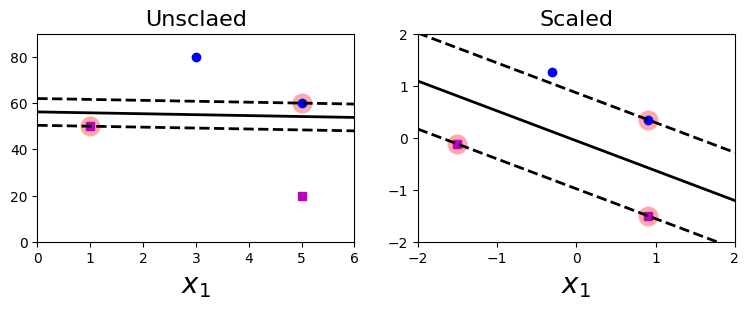

In [24]:
#Scaling
Xs = np.array([[1,50],[5,20],[3,80],[5,60]]).astype(np.float64)
ys = np.array([0,0,1,1])
svm_clf = SVC(kernel="linear",C=100)
svm_clf.fit(Xs,ys)

plt.figure(figsize=(9,2.7))
plt.subplot(121)
plt.plot(Xs[:, 0][ys==1],Xs[:, 1][ys==1],"bo")
plt.plot(Xs[:, 0][ys==0],Xs[:, 1][ys==0],"ms")
plot_svc_decision_boundary(svm_clf,0,6)
plt.xlabel("$x_0$",fontsize=20)
plt.xlabel("$x_1$",fontsize=20, rotation = 0)
plt.title("Unsclaed",fontsize=16)
plt.axis([0,6,0,90])


from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(Xs)
svm_clf.fit(X_scaled,ys)

plt.subplot(122)
plt.plot(X_scaled[:,0][ys==1],X_scaled[:,1][ys==1],"bo")
plt.plot(X_scaled[:,0][ys==0],X_scaled[:,1][ys==0],"ms")
plot_svc_decision_boundary(svm_clf,-2,2)
plt.xlabel("$x_0$",fontsize=20)
plt.xlabel("$x_1$",fontsize=20, rotation = 0)
plt.title("Scaled",fontsize=16)
plt.axis([-2,2,-2,2])




**Non** **Linear** **classifier**

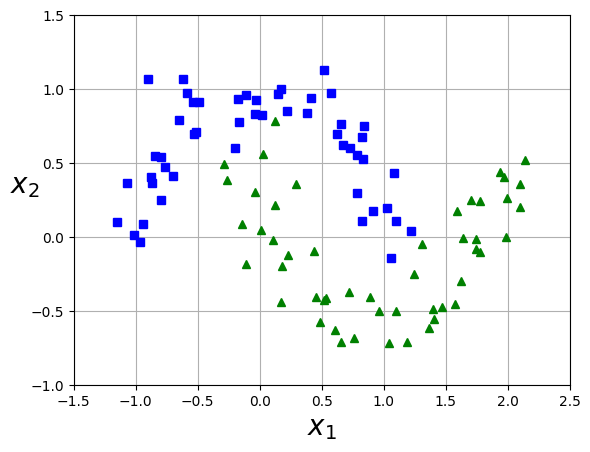

In [25]:
from sklearn.datasets import make_moons
X,y = make_moons(n_samples=100,noise=0.15,random_state=60)

def plot_dataset(X,y,axes):
  plt.plot(X[:,0][y==0],X[:,1][y==0],"bs")
  plt.plot(X[:,0][y==1],X[:,1][y==1],"g^")
  plt.axis(axes)
  plt.grid(True,which="both")
  plt.xlabel(r"$x_1$",fontsize=20)
  plt.ylabel(r"$x_2$",fontsize=20,rotation=0)
plot_dataset(X,y,[-1.5,2.5,-1,1.5])
plt.show()

**Pipeline**

In [28]:
Xs = np.array([[1,50],[5,20],[3,80],[5,60]]).astype(np.float64)
ys = np.array([0,0,1,1])

In [29]:
from sklearn.pipeline import Pipeline

In [50]:
svm_pipe = Pipeline([("scaler",StandardScaler()),
                     ("svm_clf",SVC(kernel="linear",C=100))])
print(svm_pipe.named_steps.keys())

dict_keys(['scaler', 'svm_clf'])


In [51]:
svm_pipe.fit(Xs,ys)


Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=100, kernel='linear'))])

In [52]:
#Accesing Individual model
# Assuming svc_pipe is your pipeline
svm_clf = svm_pipe.named_steps['svm_clf']

# Now you can use svm_clf as the individual SVM classifier


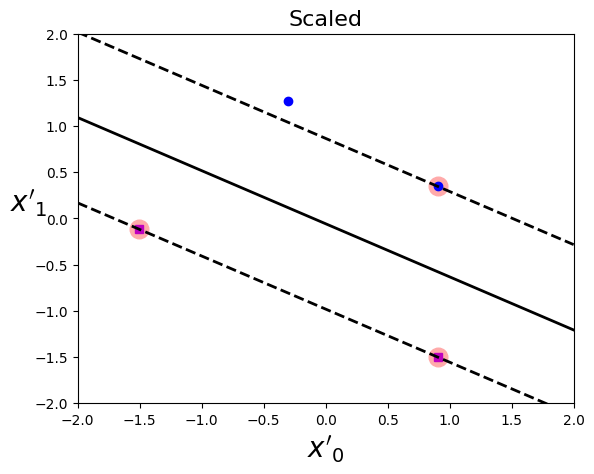

In [55]:
plt.plot(X_scaled[:,0][ys==1],X_scaled[:,1][ys==1],"bo")
plt.plot(X_scaled[:,0][ys==0],X_scaled[:,1][ys==0],"ms")
plot_svc_decision_boundary(svm_pipe.named_steps['svm_clf'],-2,2)
plt.xlabel("$x'_0$",fontsize=20)
plt.ylabel("$x'_1$",fontsize=20,rotation=0)
plt.title("Scaled",fontsize=16)
plt.axis([-2,2,-2,2]);


**Polynomial Features**

In [26]:
from sklearn.preprocessing import PolynomialFeatures

In [27]:
x = np.arange(1,4).reshape(-1,1)
x

array([[1],
       [2],
       [3]])

In [56]:
pf = PolynomialFeatures(degree=2)

In [57]:
pf.fit_transform(x) #first is bias term,remaining columns are Weight terms(x,x**2)as degree=2

array([[1., 1., 1.],
       [1., 2., 4.],
       [1., 3., 9.]])

In [58]:
pf = PolynomialFeatures(degree=3) #Degree 3
pf.fit_transform(x)

array([[ 1.,  1.,  1.,  1.],
       [ 1.,  2.,  4.,  8.],
       [ 1.,  3.,  9., 27.]])

In [59]:
#Bring back non-linear classifier data

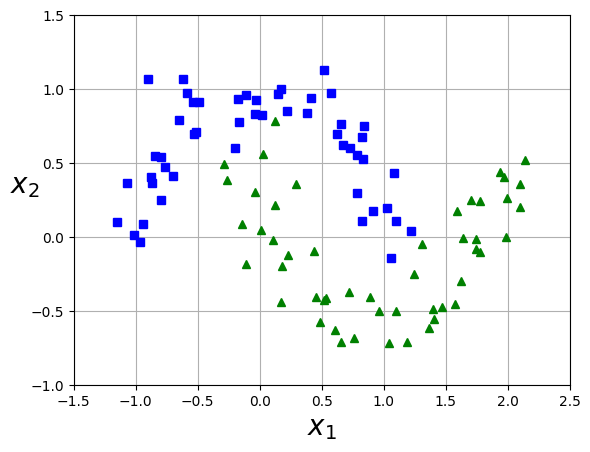

In [67]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

X, y = make_moons(n_samples=100, noise=0.15, random_state=60)

def plot_datasets(X, y, axes):
    plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], "bs")
    plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)


plot_datasets(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()



In [91]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import LinearSVC

polynomial_svm_clf = Pipeline([
    ("poly_features",PolynomialFeatures(degree=3)),
    ("scaler",StandardScaler()),
    ("svm_clf", SVC(kernel='poly', degree=3, C=10, coef0=1, random_state=42))
  ])
polynomial_svm_clf.fit(X,y)

Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf',
                 SVC(C=10, coef0=1, kernel='poly', random_state=42))])

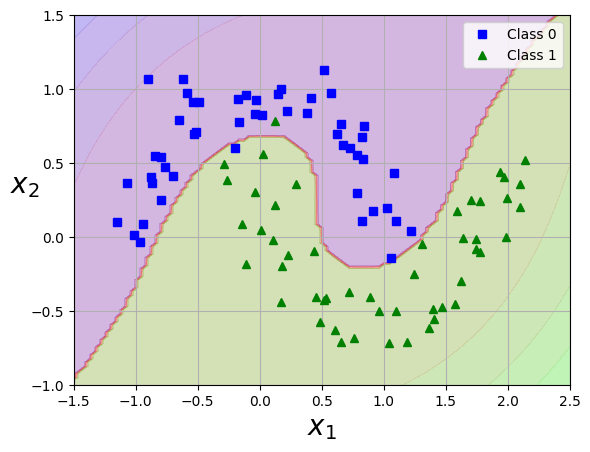

In [90]:
def plot_predictions_and_dataset(clf, X, y, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X_mesh = np.c_[x0.ravel(), x1.ravel()]

    y_pred = clf.predict(X_mesh).reshape(x0.shape)
    y_decision = clf.decision_function(X_mesh).reshape(x0.shape)

    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

    indices_class_0 = np.where(y == 0)[0]
    indices_class_1 = np.where(y == 1)[0]

    plt.plot(X[indices_class_0, 0], X[indices_class_0, 1], "bs", label="Class 0")
    plt.plot(X[indices_class_1, 0], X[indices_class_1, 1], "g^", label="Class 1")

    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)
    plt.legend()

plot_predictions_and_dataset(polynomial_svm_clf, X, y, [-1.5, 2.5, -1, 1.5])
plt.show()





